<img src='https://i.ytimg.com/vi/js1CtxSY38I/maxresdefault.jpg'>

<img src='https://velog.velcdn.com/images/jhbale11/post/e7070f94-727c-41f7-969a-c55afc61bb95/image.jpg'>

# Attention Mechanism

**Seq2seq 모델은 기존의 RNN 모델과 같이 고정된 길이의 벡터를 입력으로 받아 고정된 벡터를 출력하는 구조를 가지고 있음.** 그러나 이 구조는 고정된 길이의 벡터 압축으로 시퀀스의 길이가 길어질수록 정보의 손실이 발생할 수 있음.

이러한 한계를 보완하기 위해 Attention mechanism이 도입되었음. **Attention mechansim은 입력 문장의 모든 단어를 동일한 가중치로 취급하지 않고, 출력 문장에서 특정 위치에 대응하는 입력 단어들에 더 많은 가중치를 부여함.**

# Attention Function

Attention Function은 **입력 시퀀스의 각 단어들의 대한 가중치를 계산하는 함수.** 이 함수는 각 단어의 중요도를 측정하여 출력 결과에 반영함.

Attention Function은 크게 세 가지 요소로 구성됨. Query, Key, Value입니다.

**Query는 현재 출력 단어를 나타내는 벡터(t 시점의 디코더 셀에서의 은닉 상태)이고, Key와 Value는 입력 시퀀스의 각 단어에 대응하는 벡터(모든 시점의 인코더 셀의 은닉 상태들)**

<center>
<img src='https://velog.velcdn.com/images%2Fsjinu%2Fpost%2F0c796b58-065e-4b45-bbd7-712d3fc1d05b%2Fimage.png'>
</center>

Attention(Q,K,V) = Attention Value

어텐션 함수는 주어진 '쿼리(Query)'에 대해 '키(Key)'의 유사도를 각각 구함. 그리고,  이 유사도는 키(key)와 매핑되어 있는 각각의 값(Value)에 반영해줌. 유사도가 반영된 값(Value)을 모두 더해서 리턴하고, 어텐션 값(Attention Value)를 반환.

1) Key vector를 생성.

각 단어(토큰)을 벡터화함.
- key
    - Encoder hidden state
    - Encoder가 각 단어(토큰)마다 이해한 내

2) Query와 key를 dot product

디코더가 지금까지 문장을 정리애온 내용인, query를 가져와서 Key와 dot product하여 유사도를 구함.

- query
    - Decoder hidden state
    - 디코더가 지금까지 문장을 생성하면서 정리해온 내용

    - 왜 Query라고 부를까?
        - 검색할 때, Query를 이용해서 원하는 결과를 찾아냄.
        - 디코더도 쿼리를 이용해서 중요한 key들을 찾음.
    - 중요한 key를 찾기 위한 도구
        - query와 key를 dot product 수행 -> 유사도 scroe
        - 두 벡터가 사이즈가 안 맞기 때문에 벡터를 transpose 해서 dot product 진행
            - [1, vec_size][vec_size,1]
        - 계산하면 각 key별로 유사도
        - dot product가 왜 유사도일까?
            - dot product(내적)한다는 것은 한 벡터를 다른 벡터에 정사영한 것의 길이를 곱하는 것.
            - query 벡터에 key를 정사영해서 둘의 길이를 곱하는 것.
            - 비슷한 방향과 비슷한 크기를 가진 벡터는 내적갑싱 커지기 때문에 유사도로 사용하는 것이 타당함.
3) 구한 score에 softmax를 취해서 0~1 사이의 값으로 만듦.

4) 그 다음 Key Vector와 곱해서 value를 만듦.

- value
    - query와 key를 이용해서 score를 구한 후, softmax를 취한 값에 다시 key vector를 곱한 값.
    - aliment vector : 대응 관계를 나타내는 정보 벡터
    - key별로 하나씩 있어서 이름이 value
    - Score값이 클수록 key vector의 원래 형태가 더 많이 남아 있음.

5) Value들을 모두 더해서 context vector를 만듦.

- context vector
    - Value값들을 모두 더하기.

6) Value vector를 디코더에 입력

- 디코더가 이전스텝까지 정리한 벡터들과 concat한다.
    - 어텐션을 이용하는 방법은 많으나, 여기서는 concat으로 하자.

**어텐션 메커니즘은 인코더가 단어(토큰) 단위로 정리한 벡터 중에서 디코더가 중요한 벡터를 골라서 쓰는 방법**

**간단한 예제**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers

In [ ]:
batch_size = 1000
input_size = 32
attention_index = 7

In [ ]:
def make_data(batch_size, input_size, attention_index):
    # x -> 랜덤값
    x = np.random.standard_normal((batch_size, input_size))
    # y -> 0 또는 1값
    y = np.random.randint(low=0, high=2, size=(batch_size, 1))
    # x에서 attention_idx 자리는 y값과 동일하게
    x[:, attention_index] = y[:, 0]

    return x, y


In [ ]:
x = np.random.standard_normal((5, 7))

In [ ]:
x = np.random.randint(low=0, high=10, size=(5, 3 ))
y = np.random.randint(low=0, high=10, size=(5, 3))

In [ ]:
x = tf.constant(x)

In [ ]:
tf.matmul(x, x, transpose_b = True)

<tf.Tensor: shape=(5, 5), dtype=int64, numpy=
array([[ 41,  69,  40,  46,  39],
       [ 69, 146,  85, 117, 101],
       [ 40,  85,  50,  69,  60],
       [ 46, 117,  69, 105,  92],
       [ 39, 101,  60,  92,  81]])>

In [ ]:
x

<tf.Tensor: shape=(5, 3), dtype=int64, numpy=
array([[3, 6, 7],
       [2, 0, 3],
       [5, 9, 4],
       [4, 6, 4],
       [4, 3, 4]])>

In [ ]:
tf.transpose(x)

<tf.Tensor: shape=(3, 5), dtype=int64, numpy=
array([[1, 7, 4, 8, 7],
       [6, 9, 5, 5, 4],
       [2, 4, 3, 4, 4]])>

In [ ]:
import sklearn.metrics
sklearn.metrics.pairwise.cosine_similarity(x, x)

array([[1.        , 0.89182724, 0.88345221, 0.70108593, 0.67675297],
       [0.89182724, 1.        , 0.99484975, 0.94496296, 0.92875772],
       [0.88345221, 0.99484975, 1.        , 0.95229047, 0.94280904],
       [0.70108593, 0.94496296, 0.95229047, 1.        , 0.99758674],
       [0.67675297, 0.92875772, 0.94280904, 0.99758674, 1.        ]])

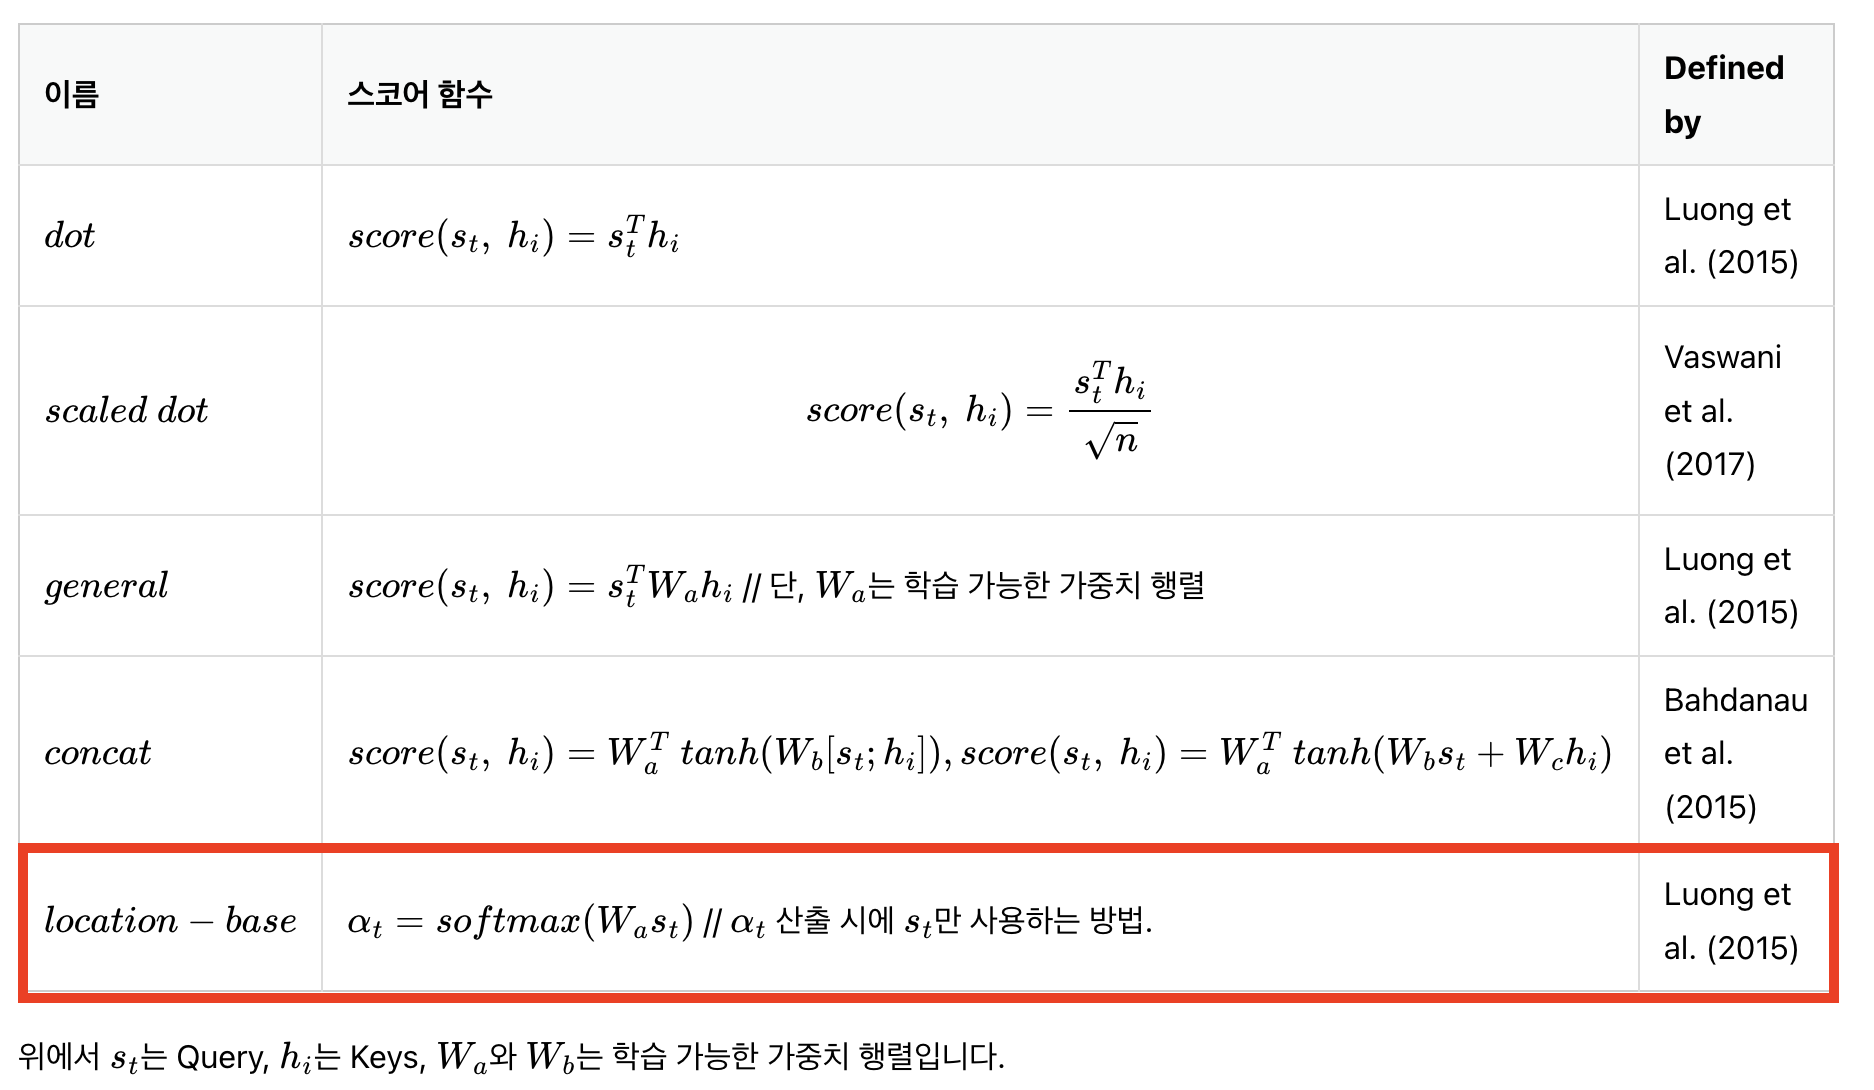

이번 실습에서는 여러가지 Attention 함수들 중에 location-base 함수를 이용하여 계산해보겠습니다.

In [ ]:
# 예시
x = tf.constant([[1, 2, 3]], dtype = tf.float32)
x

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>

In [ ]:
att = layers.Dense(3, activation = 'softmax', name = 'attention_layer')(x)

layers.Multiply()([x, att])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.47090384, 0.9624422 , 0.14362523]], dtype=float32)>

In [ ]:
input = tf.keras.Input(shape=(input_size, ))

# Attention Layer
attention_score = layers.Dense(input_size, activation = 'softmax', name = 'attention_layer')(input)
mul = layers.Multiply()([input, attention_score])

# Classifier
x = layers.Dense(64, activation = 'relu')(mul)
output = layers.Dense(1, activation = 'sigmoid')(x)

In [ ]:
model = models.Model(input, output)

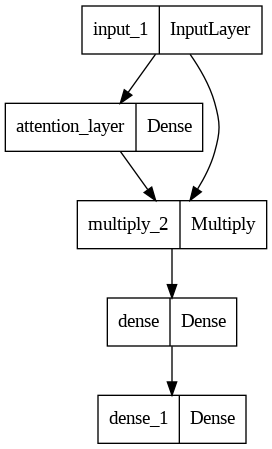

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32)]                 0         []                            
                                                                                                  
 attention_layer (Dense)     (None, 32)                   1056      ['input_1[0][0]']             
                                                                                                  
 multiply_2 (Multiply)       (None, 32)                   0         ['input_1[0][0]',             
                                                                     'attention_layer[0][0]']     
                                                                                                  
 dense (Dense)               (None, 64)                   2112      ['multiply_2[0][0]']      

In [ ]:
x, y = make_data(batch_size, input_size, attention_index)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.fit(x, y, epochs = 100, batch_size = 64,  validation_split= 0.2)

Epoch 1/100
13/13 [==============================] - 3s 25ms/step - loss: 0.6921 - acc: 0.5337 - val_loss: 0.6929 - val_acc: 0.4800
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6883 - acc: 0.5487 - val_loss: 0.6921 - val_acc: 0.4750
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6857 - acc: 0.5525 - val_loss: 0.6916 - val_acc: 0.4800
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6832 - acc: 0.5487 - val_loss: 0.6915 - val_acc: 0.4800
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6799 - acc: 0.5450 - val_loss: 0.6901 - val_acc: 0.4800
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6764 - acc: 0.5475 - val_loss: 0.6881 - val_acc: 0.4800
Epoch 7/100
13/13 [==============================] - 0s 9ms/step - loss: 0.6720 - acc: 0.5525 - val_loss: 0.6853 - val_acc: 0.4850
Epoch 8/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6666 - 

In [ ]:
test_x, test_y = make_data(batch_size, input_size, 7)

result = model.evaluate(test_x, test_y, batch_size = 64)
print(result[0])
print(result[1])

16/16 [==============================] - 0s 3ms/step - loss: 0.3722 - acc: 0.8970
0.372239887714386
0.8970000147819519


In [ ]:
att_model = models.Model(input, attention_score)
att_model

In [ ]:
test_att_score = att_model(test_x)
test_att_score

<tf.Tensor: shape=(1000, 32), dtype=float32, numpy=
array([[0.00126575, 0.01670828, 0.0084762 , ..., 0.00382653, 0.00446497,
        0.0016641 ],
       [0.25103816, 0.05961323, 0.06345446, ..., 0.00622265, 0.04741044,
        0.00618363],
       [0.11695807, 0.03725618, 0.02334712, ..., 0.00389039, 0.00690752,
        0.0777325 ],
       ...,
       [0.01331967, 0.03442257, 0.0021092 , ..., 0.01954073, 0.00255577,
        0.02419289],
       [0.03468937, 0.03752515, 0.01592486, ..., 0.04988884, 0.03018467,
        0.0779473 ],
       [0.01235508, 0.00344414, 0.00493617, ..., 0.01464102, 0.00991482,
        0.01415476]], dtype=float32)>

In [ ]:
np.mean(test_att_score, axis=0)

array([0.02488733, 0.05498062, 0.01757189, 0.01568997, 0.01351959,
       0.01656315, 0.02362362, 0.22688437, 0.02663627, 0.03739917,
       0.02285173, 0.03321218, 0.01049041, 0.03621343, 0.02137852,
       0.04125557, 0.0167651 , 0.02879183, 0.01959933, 0.0398655 ,
       0.0151652 , 0.01948857, 0.03419116, 0.01878912, 0.01397923,
       0.00978386, 0.03475155, 0.02589531, 0.0338225 , 0.02083945,
       0.01097145, 0.03414305], dtype=float32)

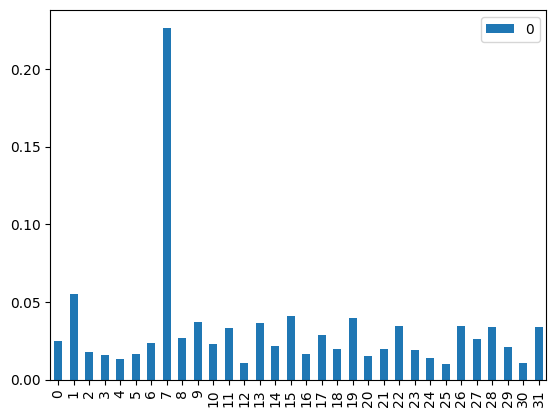

In [ ]:
pd.DataFrame(np.mean(test_att_score, axis=0)).plot(kind='bar')
plt.show()

# 근본적인 이해

이번 시간에는 **어텐션(Attention)의 근본적인 이해**를 해보도록 하겠습니다.  
어텐션은 단어(**It**)와 문장(**The** **animal** **didn't** **cross** **the** **street** **because** **it was too tired**) 내의 단어 각각과의  
닮은 정도를 나타내는 것입니다.  
![Imgur](https://i.imgur.com/x1GYPP0.png)  
  출처 : http://jalammar.github.io/illustrated-transformer/
  
  그림을 보면서 감을 잡아보도록 하겠습니다.  
**The animal didn't cross the street because it was too tired (그 동물은 길을 건너지 않았다. 왜냐하면 It(그 동물)은 너무 지쳤기 때문이다.)**  
그림에서는 실선의 진한 정도로 It과 앞 문장안의 단어들간의 관계를 표현하고 있습니다.  
**It(동물)**은 사실 **앞 문장**에서 **The animal**이기 때문에, **The animal**과의 관계가 가장 진한 실선으로 크게 나타납니다. 그렇다고 해서 다른 단어들간의 관계 또한 아예 없는 것도 아닙니다. 문장 속에서 단어를, 다른 문장 내부의 단어들과의 관계의 정도를 나타내는 방식을 어텐션이라고 합니다.


같은 문장과 같은 문장의 어텐션을 **Self Attention**이라고 합니다.  
**트랜스포머나, 버트 모형**에서는 셀프 어텐션을 사용해서 **단어와 문장간의 관계**를 즉, **닮은 정도**를 딥-러닝을 통해 학습하게 됩니다.


버트나 트랜스포머를 직접 구현하면서 배우는 어텐션은 처음에 구현하기에 난도가 높은 편이므로, 간단하게 word2vec을 약간 개선한 glove를 활용하여 직접 어텐션을 구현해보고, 그림으로 나타내보도록 하겠습니다.

- Glove 참고) https://blog.naver.com/ljk041180/222574285675

분석에 필요한 모듈을 임포트합니다.

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import gensim
import os, requests, shutil

import re

영어 단어 하나 하나를 임베딩 한 glove를 로드합니다.

In [ ]:
glove_dir = './glove'
glove_100k_50d = 'glove.first-100k.6B.50d.txt'
glove_100k_50d_path = os.path.join(glove_dir, glove_100k_50d)

data_cache = './data/cache'
glove_full_tar = 'glove.6B.zip'
glove_full_50d = 'glove.6B.50d.txt'


download_url= 'http://redcatlabs.com/downloads/deep-learning-workshop/notebooks/data/RNN/'+glove_100k_50d
original_url = 'http://nlp.stanford.edu/data/'+glove_full_tar

if not os.path.isfile( glove_100k_50d_path ):
    if not os.path.exists(glove_dir):
        os.makedirs(glove_dir)


    response = requests.get(download_url, stream=True)
    if response.status_code == requests.codes.ok:
        print("Downloading 42Mb pre-prepared GloVE file from RedCatLabs")
        with open(glove_100k_50d_path, 'wb') as out_file:
            shutil.copyfileobj(response.raw, out_file)
    else:

        if not os.path.exists(data_cache):
            os.makedirs(data_cache)

        if not os.path.isfile( os.path.join(data_cache, glove_full_50d) ):
            zipfilepath = os.path.join(data_cache, glove_full_tar)
            if not os.path.isfile( zipfilepath ):
                print("Downloading 860Mb GloVE file from Stanford")
                response = requests.get(download_url, stream=True)
                with open(zipfilepath, 'wb') as out_file:
                    shutil.copyfileobj(response.raw, out_file)
            if os.path.isfile(zipfilepath):
                print("Unpacking 50d GloVE file from zip")
                import zipfile
                zipfile.ZipFile(zipfilepath, 'r').extract(glove_full_50d, data_cache)

        with open(os.path.join(data_cache, glove_full_50d), 'rt') as in_file:
            with open(glove_100k_50d_path, 'wt') as out_file:
                print("Reducing 50d GloVE file to first 100k words")
                for i, l in enumerate(in_file.readlines()):
                    if i>=100000: break
                    out_file.write(l)


print("GloVE available locally")

def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

word_embedding = loadGloveModel(glove_100k_50d_path)

GloVE available locally
Loading Glove Model
Done. 100000  words loaded!


임베딩 벡터들이 잘 로드되었는지 10단어만 확인해보도록 하겠습니다.

In [ ]:
[(x,y) for x,y in word_embedding.items()][:10]

[('the',
  array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
         -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
          2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
          1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
         -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
         -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
          4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
          7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
         -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
          1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])),
 (',',
  array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
         -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
         -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
         -0.4163

sen2vec 함수를 정의합니다.  
문장을 단어들의 임베딩 벡터로 변환해줍니다.  
i have a boyfriend 라는 문장을 예로 들면,  
[i, have, a, boyfriend]로 split 되고,  
i에 해당하는 임베딩 벡터(50차원), have에 해당하는 임베딩 벡터(50차원), a에 해당하는 임베딩 벡터(50차원), boyfriend에 해당하는 임베딩 벡터(50차원)의 묶음이 리턴됩니다.  
즉 [i(임베딩벡터), have(임베딩벡터), a(임베딩벡터), boyfriend(임베딩벡터)]를 리턴하게 됩니다.

In [ ]:
def sen2vec(sentence):
  sentence = sentence.lower()
  sent_list = list(map(lambda x: re.sub(r'[^a-zA-Z]+', "", x), sentence.split()))

  vecs = []
  for word in sent_list:
    try:
      word_vec = word_embedding[word]
      vecs.append(word_vec)
    except:
      word_vec = np.zeros(50)
      vecs.append(word_vec)
  return np.array(vecs)

In [ ]:
sen_vec = sen2vec("i have a boyfriend")
print(sen_vec)

[[ 1.1891e-01  1.5255e-01 -8.2073e-02 -7.4144e-01  7.5917e-01 -4.8328e-01
  -3.1009e-01  5.1476e-01 -9.8708e-01  6.1757e-04 -1.5043e-01  8.3770e-01
  -1.0797e+00 -5.1460e-01  1.3188e+00  6.2007e-01  1.3779e-01  4.7108e-01
  -7.2874e-02 -7.2675e-01 -7.4116e-01  7.5263e-01  8.8180e-01  2.9561e-01
   1.3548e+00 -2.5701e+00 -1.3523e+00  4.5880e-01  1.0068e+00 -1.1856e+00
   3.4737e+00  7.7898e-01 -7.2929e-01  2.5102e-01 -2.6156e-01 -3.4684e-01
   5.5841e-01  7.5098e-01  4.9830e-01 -2.6823e-01 -2.7443e-03 -1.8298e-02
  -2.8096e-01  5.5318e-01  3.7706e-02  1.8555e-01 -1.5025e-01 -5.7512e-01
  -2.6671e-01  9.2121e-01]
 [ 9.4911e-01 -3.4968e-01  4.8125e-01 -1.9306e-01 -8.8384e-03  2.8182e-01
  -9.6130e-01 -1.3581e-01 -4.3083e-01 -9.2933e-02  1.5689e-01  5.9585e-02
  -4.9635e-01 -1.7414e-01  7.5661e-01  4.9210e-01  2.1773e-01 -2.2778e-01
  -1.3686e-01 -9.0589e-01 -4.8781e-01  1.9919e-01  9.1447e-01 -1.6203e-01
  -2.0645e-01 -1.7312e+00 -4.7622e-01 -4.8540e-02 -1.4027e-01 -4.5828e-01
   4.0326e+

In [ ]:
# 4개의 단어, 단어 하나하나당 50차원의 벡터
sen_vec.shape

(4, 50)

Softmax 함수를 정의해줍니다.  
왜 Softmax를 사용하냐면, 단어와 문장을 inner product(내적)한 후,  
softmax 함수를 통해서 내적의 값을 0과 1 사이로 스케일링 해 줍니다.  

  
a 벡터와 b 벡터를 내적한다는 것의 의미는, a와 b가 얼마나 가까운지를 나타내는 것입니다.  
자연어에서는 단어 a의 임베딩과 단어 b의 임베딩을 내적하는 것입니다.  
만약 벡터 a가 [x1,x2], 벡터 b가 [y1,y2]라면 내적 값은 x1 * y1 + x2 * y2 입니다.   
그리고 a와 b의 내적은 lallblcos(θ) = x1 * y1 + x2 * y2 이기 때문에 a와 b가 가까울 수록, 내적의 값은 일반적으로 커지게 됩니다.

![Imgur](https://i.imgur.com/8CWYkqO.jpg)


softmax 함수에서, 가로 축의 합이 1이 되게 만들어 줍니다.  
만약 (단어1, 단어2)를 (단어3, 단어4)와 내적하고 소프트맥스 함수를 출력하면, 2 x 2 행렬이 나오게 됩니다.  

예를 들어 단어 1, 단어 2를 [1,0] 이라 가정하고, 단어 3, 단어 4를 [4,9]라 가정한다면,   
아웃풋 값은 [[0.73, 0.27], [0.006, 0.993]]  이 되는데,   
첫 번째 행인 [0.73, 0.27]의 의미는 단어 1을 단어 3, 단어 4와 내적하고 소프트맥스 계층을 출력했을 때의 값입니다.  
두 번째 행인 [0.006, 0.993]의 의미는 마찬가지로 단어 2를 단어 3, 단어 4와 내적한 다음 소프트맥스 계층을 출력했을 때의 값을 의미합니다.  
  

엄밀하진 않지만, 쉽게 설명 드리자면 **단어 1은 단어 3과 0.73만큼** 닮았고, **단어 4와 0.27만큼** 닮았다는 뜻입니다.  
**단어 2는 단어 3과 0.006만큼** 닮았고, **단어 4와 0.993만큼** 닮았다는 뜻입니다.  
  
약간 헷갈리실 수 있는데, 단어는 50차원을 가진다고 했었는데 너무 단순하게 가정했습니다.  
그렇지만 사실 50차원이라 가정해도 결과는 동일합니다 왜냐하면 단어 1과 단어 2는 (2, 50) 차원이고, 단어 3과 4 또한 (2,50) 차원이고, 단어 1과 단어 2의 묶음을 행렬 A라 가정하고, 단어 3과 4를 B라 가정하면, 내적 값은 행렬곱 A * (B의 전치행렬) 이 되어서 2 * 2 행렬을 최종 출력값으로 나타냅니다.

In [ ]:
def softmax(x):
    e_x = x - np.max(x, axis=-1)[np.newaxis,:].T
    e_x = np.exp(e_x)
    return e_x / e_x.sum(axis = - 1)[np.newaxis,:].T

scores = np.array([[1,0],[4,9]])
print(softmax(scores))

[[0.73105858 0.26894142]
 [0.00669285 0.99330715]]


In [ ]:
0.7*4+0.3*9, 0.006*4+0.993*9

(5.5, 8.960999999999999)

예를 들어 **문장1 : (단어1, 단어2)** **문장2 : (단어3, 단어4)** 라 했을 때,  
소프트맥스 함수 결과가 (0.7, 0.3), (0.006, 0.994)가 나왔다고 치겠습니다.  
이 결과가 의미하는 것은 **단어 1 은 단어 3과 0.7의 관계**, **단어 4와 0.3의 관계**가 있다는 의미입니다.  
마찬가지로 **단어 2는 단어 3과 0.006의 관계**, **단어 4와 0.99의 관계**가 있다는 의미입니다.

어텐션을 계산하는 일반적인 함수를 만들어보도록 하겠습니다.  
attention_weights는 문장1과 문장2의 소프트맥스 함수 값,  
output은 문장 1의 단어를 문장 2의 조합으로 나타낸 결과를 나타냅니다.  
output의 값은  단어 1 = 0.7 * 단어3 + 0.3 * 단어 4  
단어 2 = 0.006 * 단어 3 + 0.3 * 단어 4 과 같은 방식으로 표현한 것입니다.

In [ ]:
def get_attention_output(query, key, value):
  qk = np.matmul(query, key.T) # query와 key의 내적, query shape = (문장길이, 50차원), key shape = (문장길이, 50차원), value shape = (문장길이, 50차원)
                               # dk 차원은 = (문장길이 * 문장길이)
                               # 참고로 문장길이는 문장 내의 단어의 수( I have a boyfriend에서 단어의 수는 4)



query, key, value를 다 같은 함수로 입력하면 self-attention임(자기 자신과의 내적값 계산)  
트랜스포머의 인코더나 버트에서는 query, key, value가 같은 문장이 들어감

In [ ]:
get_attention_output(sen_vec, sen_vec, sen_vec)

(array([[0.82539694, 0.09316572, 0.06088821, 0.02054913],
        [0.24189774, 0.62320525, 0.11484694, 0.02005007],
        [0.20616176, 0.14976789, 0.59562366, 0.04844669],
        [0.17029765, 0.06399637, 0.11857808, 0.6471279 ]]),
 array([[ 0.20148931,  0.1350191 , -0.04919069, -0.62667824,  0.69878051,
         -0.30134875, -0.39557182,  0.41363015, -0.85503068,  0.00940032,
         -0.12359533,  0.68384829, -0.96897992, -0.40569282,  1.19472097,
          0.53073572,  0.12215698,  0.37948309, -0.11376776, -0.69177315,
         -0.66608226,  0.68251418,  0.76935583,  0.24410869,  1.09479813,
         -2.4502045 , -1.16545866,  0.40233508,  0.84878785, -1.01198183,
          3.49924182,  0.65185857, -0.6336274 ,  0.15874573, -0.16779519,
         -0.27276485,  0.4646489 ,  0.63311789,  0.42229858, -0.25748515,
         -0.0596501 ,  0.05494532, -0.23567894,  0.54065008,  0.07713821,
          0.11268194, -0.2033952 , -0.47057798, -0.25308031,  0.72569551],
        [ 0.64684167, -0.

In [ ]:
def plot_attention_weights(sentence1, sentence2):
  fig = plt.figure(figsize=(8, 8))
  sen_len1 = len(sentence1.split())
  sen_len2 = len(sentence2.split())
  sent_embedding1 = sen2vec(sentence1)
  sent_embedding2 = sen2vec(sentence2)
  attention, _ = get_attention_output(sent_embedding1, sent_embedding2, sent_embedding2)
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='gray')

  fontdict = {'fontsize': 10}
  ax.set_xticks(range(sen_len2))
  ax.set_yticks(range(sen_len1))

  ax.set_xticklabels([i for i in sentence2.split()], fontdict=fontdict)
  ax.set_yticklabels([i for i in sentence1.split()], fontdict=fontdict)

  for (i, j), z in np.ndenumerate(attention):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center', c='r')

  plt.tight_layout()
  plt.show()

그림으로 보면서 알아보도록 하겠습니다.  
**같은 문장끼리의 어텐션 값 출력 -> 셀프 어텐션**

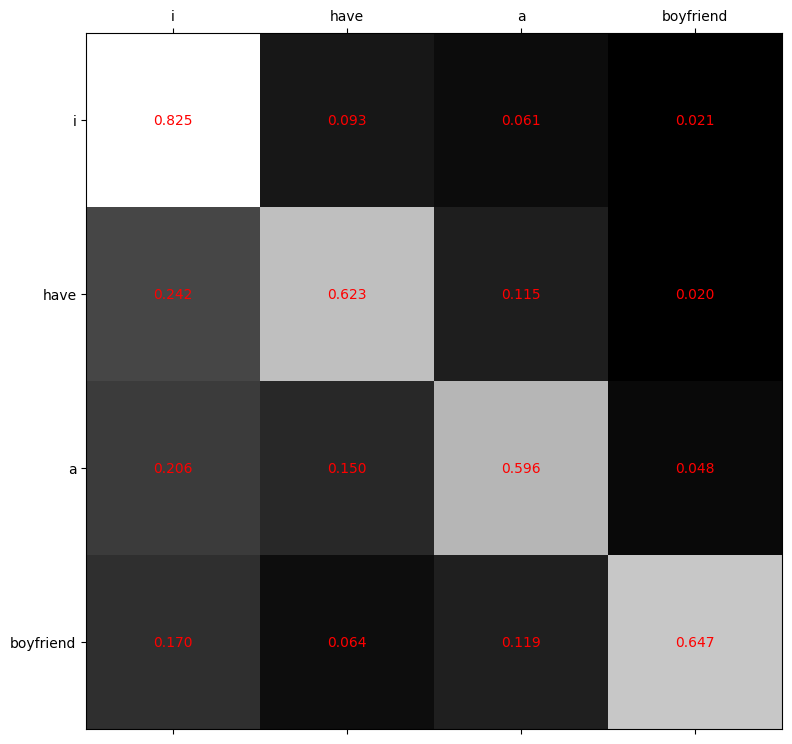

In [ ]:
plot_attention_weights("i have a boyfriend", "i have a boyfriend")

In [ ]:
#boyfriend에 해당하는 어텐션 값
0.170*sen2vec("i") + 0.064*sen2vec("have") + 0.119*sen2vec("a") + 0.647*sen2vec("boyfriend")

array([[ 0.16034535,  0.47957976,  0.03002168, -0.21607726,  0.60416687,
         0.83479433, -0.7356768 ,  0.59505765, -0.50268774,  0.30966365,
        -0.00994146,  0.52705465, -0.81798531,  0.095091  ,  1.15476106,
         0.06518995, -0.27988708,  0.06770148,  0.0971266 , -0.055953  ,
        -0.2617946 ,  1.19704568, -0.05487257,  0.85145882,  0.30843437,
        -1.7731391 , -0.01351534,  0.05490606,  0.55338659, -0.21325899,
         1.79331844, -0.04097162, -0.2160923 ,  0.1190448 ,  0.36594174,
         0.20308263,  0.13083143, -0.02761193,  0.44506859, -0.6116534 ,
         0.24350784,  0.65293461, -0.26075458,  0.15072852,  0.67040178,
        -0.70378953, -0.01286389, -0.92884944,  0.26075242,  0.48927489]])

첫번째 튜플은 소프트맥스 값이고,  

두번째 튜플이 어텐션 값(4,50차원)인데, 차례대로 i, have, a, boyfriend에 해당하는 어텐션 값을 나타냅니다.

In [ ]:
get_attention_output(sen2vec("i have a boyfriend"),sen2vec("i have a boyfriend"),sen2vec("i have a boyfriend"))

(array([[0.82539694, 0.09316572, 0.06088821, 0.02054913],
        [0.24189774, 0.62320525, 0.11484694, 0.02005007],
        [0.20616176, 0.14976789, 0.59562366, 0.04844669],
        [0.17029765, 0.06399637, 0.11857808, 0.6471279 ]]),
 array([[ 0.20148931,  0.1350191 , -0.04919069, -0.62667824,  0.69878051,
         -0.30134875, -0.39557182,  0.41363015, -0.85503068,  0.00940032,
         -0.12359533,  0.68384829, -0.96897992, -0.40569282,  1.19472097,
          0.53073572,  0.12215698,  0.37948309, -0.11376776, -0.69177315,
         -0.66608226,  0.68251418,  0.76935583,  0.24410869,  1.09479813,
         -2.4502045 , -1.16545866,  0.40233508,  0.84878785, -1.01198183,
          3.49924182,  0.65185857, -0.6336274 ,  0.15874573, -0.16779519,
         -0.27276485,  0.4646489 ,  0.63311789,  0.42229858, -0.25748515,
         -0.0596501 ,  0.05494532, -0.23567894,  0.54065008,  0.07713821,
          0.11268194, -0.2033952 , -0.47057798, -0.25308031,  0.72569551],
        [ 0.64684167, -0.

참고로 **트랜스포머나 버트같은 딥러닝 모델에서는 태스크(Seq2Seq, 기계독해 등)**에 맞게 신경망이 훈련되면서, 어텐션 값이 지속적으로 태스크에 맞게 변경됩니다.

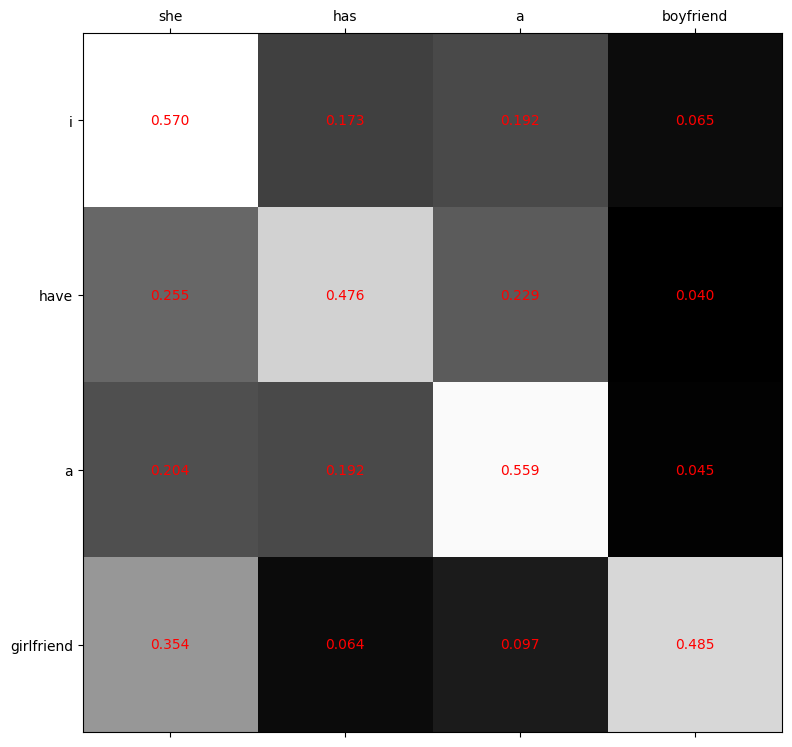

In [ ]:
plot_attention_weights("i have a girlfriend", "she has a boyfriend")

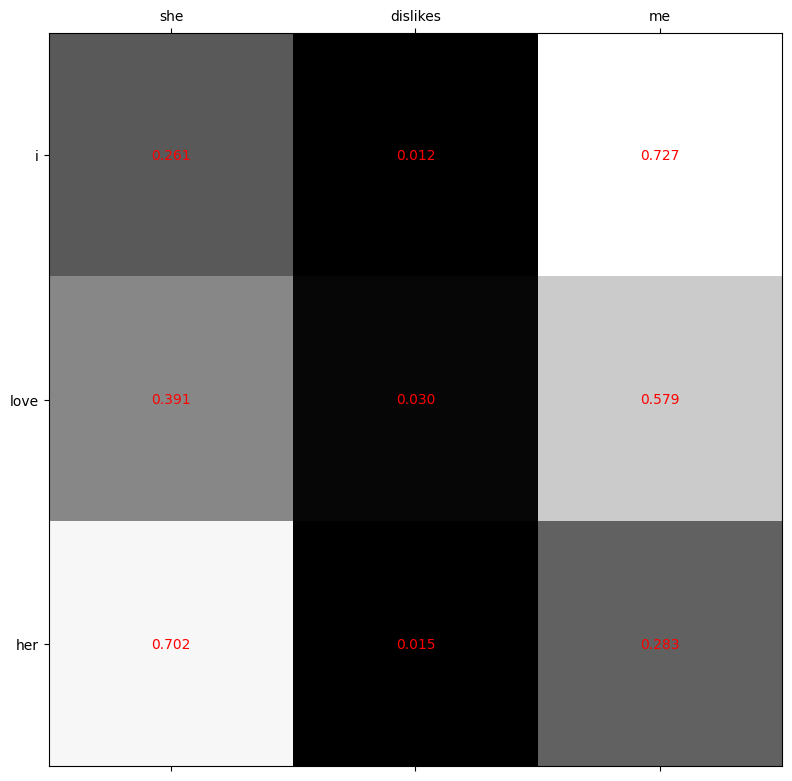

In [ ]:
plot_attention_weights("i love her", "she dislikes me")

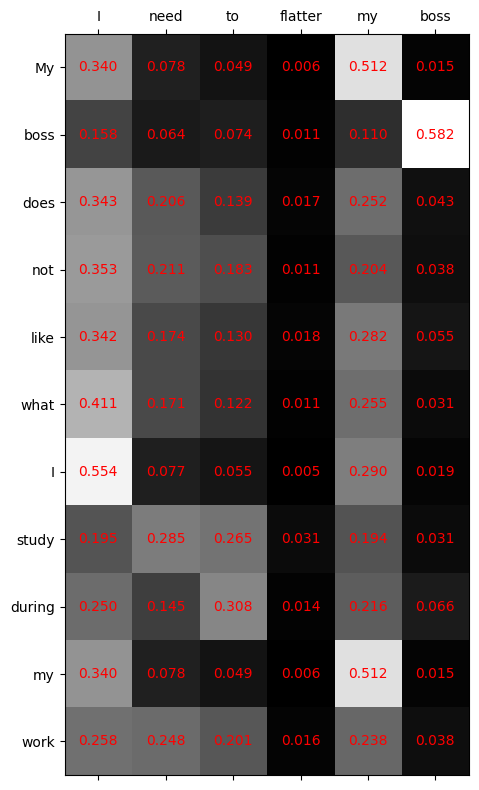

In [ ]:
plot_attention_weights("My boss does not like what I study during my work", "I need to flatter my boss")

### [1단계] Dot Product Attention - 단어 간 유사도 분석

- Query, Key, Value의 의미를 해석하고 직접 계산하자.
- 간단한 문장 내에서 Attention Weight가 어떻게 동작하는지를 시각화 해보자.

ex) 나는 학교에 간다.

각 단어에 임의의 벡터를 부여하고 Query = 특정 단어, key/value -> Attention Score 계산 후, Content Vector 도출

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 단어 리스트
words = ['나는', '학교에', '간다']

# 2. 각 단어를 임베딩 벡터로 가정(임의로 생성)
np.random.seed(0)
word_vectors = {word : np.random.rand(4) for word in words} #dim=4

# 3. Query : "간다"-> key/value : 전체
query = word_vectors['간다']
keys = np.stack([word_vectors[word] for word in words])
values = keys.copy()

# 4. Attention score(Dot Prouct)
scores = np.dot(keys,query)

# 5. softmax
def softmax(x):
    e_x = np.exp(x-np.max(x))
    return e_x / e_x.sum()

attention_weights = softmax(scores)

#6. context_vector
context_vector= np.sum(attention_weights[:,np.newaxis]*values, axis=0)

print("Attention Weights", dict(zip(words, attention_weights)))
print("Context vector", context_vector)

Attention Weights {'나는': np.float64(0.2922036677128524), '학교에': np.float64(0.26585837663428835), '간다': np.float64(0.4419379556528592)}
Context vector [0.69887665 0.55015468 0.64235924 0.63004093]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

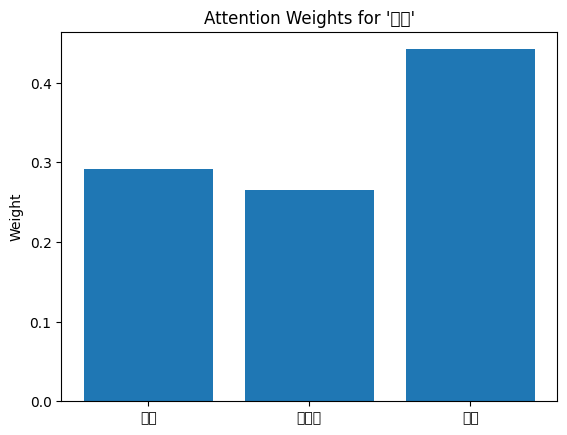

In [ ]:
#시각화 코드(추가)
plt.bar(words, attention_weights)
plt.title("Attention Weights for '간다'")
plt.ylabel('Weight')
plt.show()

- (확장)여러 단어를 Query로 설정


 [query : '나는'] Attention Weights : 
 나는 : 0.3255
 학교에 : 0.3163
 간다 : 0.3582


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

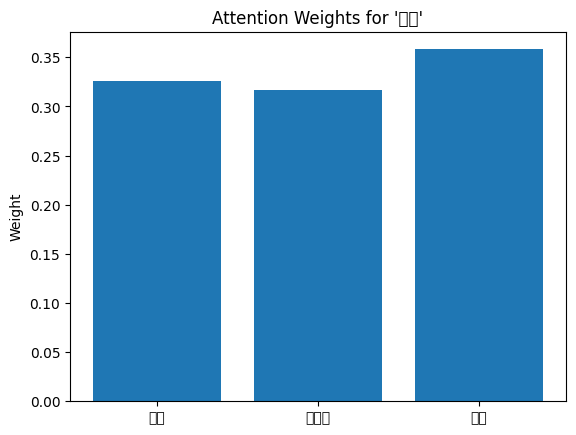


 [query : '학교에'] Attention Weights : 
 나는 : 0.3145
 학교에 : 0.3615
 간다 : 0.3240


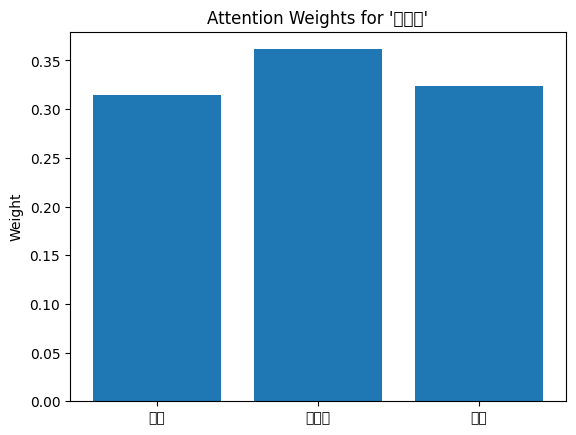


 [query : '간다'] Attention Weights : 
 나는 : 0.2922
 학교에 : 0.2659
 간다 : 0.4419


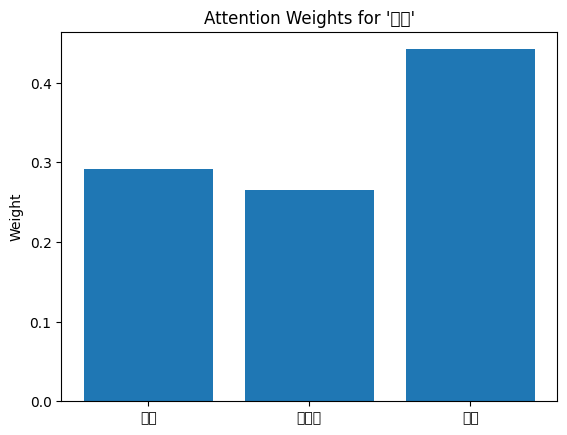

In [ ]:
#각 단어에 대해 Attention Weight를 계산
for query_word in words:
    query = word_vectors[query_word]
    scores = np.dot(keys,query)
    attention_weights = softmax(scores)

    print(f"\n [query : '{query_word}'] Attention Weights : ")
    for w,wt in zip(words, attention_weights):
        print(f" {w} : {wt:.4f}")

    #시각화
    plt.bar(words, attention_weights)
    plt.title(f"Attention Weights for '{query_word}'")
    plt.ylabel('Weight')
    plt.show()

(확장) 여러 문장 비교

In [ ]:
# 5. softmax
def softmax(x):
    e_x = np.exp(x-np.max(x))
    return e_x / e_x.sum()


문장 1 : 나는 학교에 간다
[Query : '간다'] Attention Weights:
 나는 : 0.3241
 학교에 : 0.3113
 간다 : 0.3645


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

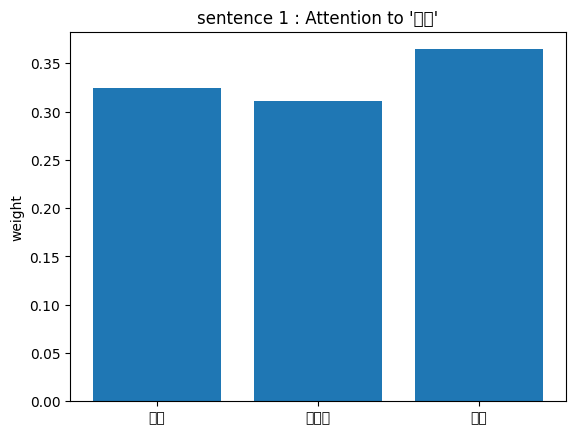


문장 2 : 너는 도서관에 간다
[Query : '간다'] Attention Weights:
 너는 : 0.2501
 도서관에 : 0.4456
 간다 : 0.3042


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


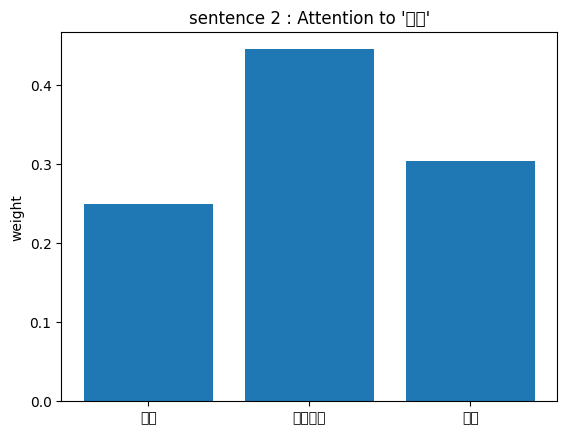


문장 3 : 그는 회사에 갔다
[Query : '갔다'] Attention Weights:
 그는 : 0.2637
 회사에 : 0.2912
 갔다 : 0.4450


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44052 (\N{HANGUL SYLLABLE GASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


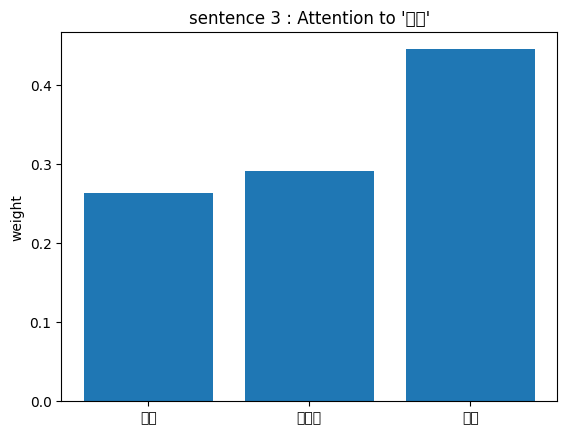

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
sentences = [
    ['나는','학교에','간다'],
    ['너는','도서관에','간다'],
    ['그는','회사에','갔다']
]
#각 문장에 대해 새로운 벡터 생성
np.random.seed(2)
def generate_word_vectors(words,dim=4):
    return {word : np.random.rand(dim) for word in words}
for i,sentence in enumerate(sentences):
    word_vecs = generate_word_vectors(sentence)
    keys = np.stack([word_vecs[word] for word in sentence])
    values = keys.copy()
    query_word = sentence[-1] #마지막 단어를 Query로 사용
    query = word_vecs[query_word]
    scores = np.dot(keys, query)
    attention_weights = softmax(scores)
    print(f"\n문장 {i+1} : {' '.join(sentence)}")
    print(f"[Query : '{query_word}'] Attention Weights:")
    for w,wt in zip(sentence, attention_weights):
        print(f" {w} : {wt:.4f}")
    #시각화
    plt.bar(sentence, attention_weights)
    plt.title(f"sentence {i+1} : Attention to '{query_word}'")
    plt.ylabel("weight")
    plt.show()

### [어텐션을 사용한 인공 신경망 기계 번역](https://www.tensorflow.org/text/tutorials/nmt_with_attention?hl=ko)

- 참고 : Attention을 사용한 인공 신경망 기계 번역 만들기(한->영)(https://blog.naver.com/ljk041180/222574285675)

- https://www.manythings.org/anki/

In [ ]:
# 필수 라이브러리 임포트
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re, io
from zipfile import ZipFile
from sklearn.model_selection import train_test_split

# kor-eng.zip은 미리 다운로드하여 Colab에 업로드한 것으로 가정
# 압축을 '/content/' 디렉토리에 해제
with ZipFile("/content/kor-eng.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

# 압축 해제된 파일 경로 지정
path_to_file = "/content/kor.txt"

# 개별 문장을 정제 및 토큰화 전처리하는 함수
def preprocess_sentence(w):
    w = w.lower().strip()  # 소문자 변환 및 공백 제거
    w = re.sub(r"([?.!,¿])", r" \1 ", w)  # 구두점 앞뒤에 공백 추가
    w = re.sub(r'[" "]+', " ", w)  # 다중 공백을 하나로 축소
    w = re.sub(r"[^a-zA-Z?.!,¿ㄱ-ㅎ가-힣]+", " ", w)  # 알파벳, 한글, 구두점 외 문자 제거
    w = w.strip()  # 좌우 공백 제거
    w = '<start> ' + w + ' <end>'  # 시작/종료 토큰 추가
    return w

# kor.txt의 각 줄을 영어-한국어 문장쌍으로 나누고 전처리하는 함수
def create_dataset(path, num_examples=None):
    lines = io.open(path, encoding='UTF-8').read().strip().split('\n')  # 파일 전체 읽고 줄 단위로 분할
    pairs = []
    for line in lines[:num_examples]:  # 지정된 수만큼 문장쌍 처리
        eng, kor = line.split('\t')  # 영어와 한글은 탭으로 구분되어 있음
        pairs.append((preprocess_sentence(kor), preprocess_sentence(eng)))  # 순서를 한글 → 영어로 저장
    return zip(*pairs)  # 결과를 리스트 두 개로 분리 (입력 언어 리스트, 출력 언어 리스트)


In [ ]:
# kor.txt 파일에서 문장쌍을 불러오는 함수
def create_dataset(path, num_examples):
    lines = io.open(path, encoding='UTF-8').read().strip().split('\n')  # 텍스트 파일을 줄 단위로 읽음

    pairs = []
    for line in lines[:num_examples]:  # 지정한 개수만큼만 처리
        parts = line.split('\t')  # 탭(\t)으로 영어/한국어 문장 분리
        if len(parts) < 2:
            continue  # 데이터가 부족한 라인은 건너뜀
        eng, kor = parts[0], parts[1]
        # 문장 전처리 후 튜플로 저장 (입력: 한국어, 출력: 영어)
        pairs.append((preprocess_sentence(kor), preprocess_sentence(eng)))

    # 리스트를 두 개의 언어별 리스트로 분리 (zip 해제 용도)
    return zip(*pairs)

# 텍스트 문장을 토큰 인덱스 시퀀스로 변환하는 함수
def tokenize(lang):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')  # 필터링 없음 (특수문자도 포함)
    tokenizer.fit_on_texts(lang)  # 텍스트 학습 (단어 인덱스 생성)
    tensor = tokenizer.texts_to_sequences(lang)  # 문장을 정수 인덱스 시퀀스로 변환
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')  # 후방 패딩
    return tensor, tokenizer

# 전체 데이터셋을 로드하고 전처리
def load_dataset(path, num_examples=None):
    inp_lang, targ_lang = create_dataset(path, num_examples)  # 입력/출력 문장 리스트 생성
    input_tensor, inp_tokenizer = tokenize(inp_lang)          # 입력 문장 토큰화
    target_tensor, targ_tokenizer = tokenize(targ_lang)       # 출력 문장 토큰화
    return input_tensor, target_tensor, inp_tokenizer, targ_tokenizer

# 1. 데이터셋 로딩
num_examples = 5000
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(path_to_file, num_examples)

# 2. 훈련/검증 데이터 분할
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)  # 80% train, 20% validation

# 3. 모델 학습을 위한 하이퍼파라미터 설정
BUFFER_SIZE = len(input_tensor_train)                 # 데이터 전체 크기
BATCH_SIZE = 32                                       # 배치 크기
embedding_dim = 128                                   # 임베딩 차원
units = 128                                           # RNN 은닉 상태 차원
steps_per_epoch = len(input_tensor_train) // BATCH_SIZE
vocab_inp_size = len(inp_lang.word_index) + 1         # 입력 어휘 사전 크기
vocab_tar_size = len(targ_lang.word_index) + 1        # 출력 어휘 사전 크기
max_length_inp = input_tensor.shape[1]                # 최대 입력 시퀀스 길이
max_length_targ = target_tensor.shape[1]              # 최대 출력 시퀀스 길이

# 4. 텐서플로우 데이터셋 구성
dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train))  # (입력, 출력) 튜플 생성
dataset = dataset.shuffle(BUFFER_SIZE)  # 셔플링
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)  # 배치화 (잔여는 버림)

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        """
        Encoder 생성자 (입력 인코더 GRU 모델)

        Args:
          vocab_size: 입력 문장의 단어 수 (어휘 사전 크기)
          embedding_dim: 임베딩 차원 (정수 시퀀스를 임베딩 벡터로 변환)
          enc_units: GRU 은닉 상태의 차원 수
          batch_sz: 한 배치의 문장 수 (배치 크기)
        """
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units

        # 임베딩 레이어: (vocab_size, embedding_dim)
        # 각 단어 인덱스를 고정 길이의 임베딩 벡터로 변환
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)

        # GRU 레이어: 시퀀스를 인코딩
        self.gru = tf.keras.layers.GRU(
            self.enc_units,
            return_sequences=True,   # 전체 시퀀스 출력 (attention 사용 위해 필요)
            return_state=True,       # 마지막 hidden state 반환
            recurrent_initializer='glorot_uniform'  # 가중치 초기화 방식
        )

    def call(self, x, hidden):
        """
        인코더 실행 시 호출되는 메서드 (입력 시퀀스 처리)

        Args:
          x: 입력 시퀀스 (batch_size, seq_length) 형태의 정수 인덱스
          hidden: GRU 초기 은닉 상태 (batch_size, enc_units)

        Returns:
          output: 모든 시점의 출력 (batch_size, seq_length, enc_units)
          state: 마지막 시점의 은닉 상태 (batch_size, enc_units)
        """
        # (batch_size, seq_length) → (batch_size, seq_length, embedding_dim)
        x = self.embedding(x)

        # GRU 통과 (초기 은닉 상태와 함께 전달)
        result = self.gru(x, initial_state=hidden)

        # 결과가 튜플인지 확인 (output, state)
        if isinstance(result, tuple):
            output = result[0]  # 전체 시퀀스 출력
            state = result[1]   # 마지막 은닉 상태
        else:
            # 예외 처리용 (대부분 필요 없음)
            output = result
            state = tf.zeros((x.shape[0], self.enc_units))

        return output, state

    def initialize_hidden_state(self):
        """
        GRU 은닉 상태를 0으로 초기화 (학습 시작 시 사용)

        Returns:
          (batch_size, enc_units) 형태의 제로 텐서
        """
        return tf.zeros((self.batch_sz, self.enc_units))


# 🧠 Bahdanau Attention (Additive Attention)

Bahdanau Attention은 2014년 논문 *Neural Machine Translation by Jointly Learning to Align and Translate* (Bahdanau et al.)에서 제안된 **Additive Attention** 메커니즘입니다.  
이 구조는 인코더의 전체 출력 시퀀스에서 현재 디코더 상태와 가장 관련 있는 정보를 **가중합(context vector)** 형태로 추출합니다.

---

## 구조 및 계산 과정

### 입력

- **query**: 현재 디코더의 hidden state  
  → shape: `(batch_size, hidden_dim)`

- **values**: 전체 인코더의 hidden states (출력 시퀀스 전체)  
  → shape: `(batch_size, seq_len, hidden_dim)`

---

### 단계별 계산

#### 1. query 차원 확장  
```python
query_with_time_axis = tf.expand_dims(query, axis=1)  # (batch, 1, hidden_dim)
```

#### 2. Score 계산 (Additive)  
$$
e_{ij} = v^T \tanh(W_1 h_i + W_2 s_j)
$$

- \( h_i \): 인코더의 i번째 hidden state  
- \( s_j \): 디코더의 j번째 hidden state

코드 상에서는 다음과 같이 구현됩니다:
```python
score = V(tanh(W1(query) + W2(values)))  # (batch_size, seq_len, 1)
```

#### 3. Attention weights (Softmax 적용)  
```python
attention_weights = softmax(score, axis=1)  # (batch_size, seq_len, 1)
```

#### 4. Context vector 계산  
```python
context_vector = attention_weights * values  # broadcasting
context_vector = reduce_sum(context_vector, axis=1)  # (batch_size, hidden_dim)
```

---

###출력

- **context_vector**: 인코더 출력의 가중합 → shape: `(batch_size, hidden_dim)`
- **attention_weights**: 각 인코더 위치에 대한 중요도 → shape: `(batch_size, seq_len, 1)`

---

## 요약

Bahdanau Attention은 디코더의 현재 상태와 인코더 출력 간의 연관도를 학습하여 **정렬(alignment)**을 수행합니다.  
이는 번역, 이미지 캡셔닝 등 다양한 Seq2Seq 구조에서 널리 사용됩니다.


In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        """
        Bahdanau Attention 클래스
        Args:
          units: 내부 신경망의 차원 (attention 계산에 사용)
        """
        super().__init__()
        # 쿼리 (디코더 hidden state)에 대한 가중치
        self.W1 = tf.keras.layers.Dense(units)

        # 값 (인코더의 전체 출력)에 대한 가중치
        self.W2 = tf.keras.layers.Dense(units)

        # 마지막으로 score를 스칼라로 출력하기 위한 밀집층
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, values):
        """
        Attention 연산을 수행하는 함수

        Args:
          query: 디코더의 이전 hidden state, shape=(batch_size, hidden_size)
          values: 인코더의 전체 출력, shape=(batch_size, seq_len, hidden_size)

        Returns:
          context_vector: context 정보가 반영된 벡터, shape=(batch_size, hidden_size)
          attention_weights: 각 인코더 위치에 대한 attention 분포, shape=(batch_size, seq_len, 1)
        """

        # query의 차원을 seq_len과 더하기 위해 확장
        # (batch_size, hidden) → (batch_size, 1, hidden)
        if len(query.shape) == 1:
            query = tf.expand_dims(query, 0)
        if len(query.shape) == 2:
            query = tf.expand_dims(query, 1)

        # Additive Attention Score 계산
        # W1(query): (batch_size, 1, units)
        # W2(values): (batch_size, seq_len, units)
        # tanh 적용 후 V를 통과시켜 스칼라 score 계산
        # score shape: (batch_size, seq_len, 1)
        score = self.V(tf.nn.tanh(
            self.W1(query) + self.W2(values)
        ))

        # Attention 가중치 softmax 적용 → (batch_size, seq_len, 1)
        attention_weights = tf.nn.softmax(score, axis=1)

        # Attention 가중치를 인코더 출력에 곱하고 시퀀스 차원에 대해 합산
        # context_vector shape: (batch_size, hidden_size)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights


In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        """
        디코더 초기화 함수
        Args:
            vocab_size: 출력 단어 집합의 크기 (target 언어)
            embedding_dim: 임베딩 차원
            dec_units: GRU 유닛 수 (은닉 상태 차원)
            batch_sz: 배치 크기
        """
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units

        # 단어 임베딩 레이어
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)

        # GRU 레이어 (디코더 RNN)
        self.gru = tf.keras.layers.GRU(
            self.dec_units,
            return_sequences=True,  # 각 시점의 출력 유지 (1 step마다 호출되더라도 일관성을 위해)
            return_state=True,      # 마지막 시점의 은닉 상태도 반환
            recurrent_initializer='glorot_uniform'
        )

        # 출력층: 어휘 크기만큼의 로짓 생성
        self.fc = tf.keras.layers.Dense(vocab_size)

        # 어텐션 메커니즘 (Bahdanau)
        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, hidden, enc_output):
        """
        디코더 1스텝 수행

        Args:
            x: 현재 입력 단어 (batch_size, 1)
            hidden: 디코더 이전 은닉 상태 (batch_size, hidden_size)
            enc_output: 인코더 전체 출력 (batch_size, seq_len, hidden_size)

        Returns:
            x: 단어 분포 출력 (batch_size, vocab_size)
            state: 다음 time step의 hidden state (batch_size, hidden_size)
            attention_weights: 현재 step의 어텐션 가중치 (batch_size, seq_len, 1)
        """

        # 1. 어텐션: context_vector (batch_size, hidden_size), attention_weights (batch_size, seq_len, 1)
        context_vector, attention_weights = self.attention(hidden, enc_output)

        # 2. 현재 입력 단어 임베딩 (batch_size, 1, embedding_dim)
        x = self.embedding(x)

        # 3. context와 임베딩 결합 (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        # 4. hidden의 차원 보정: shape (batch_size, hidden_size)
        if len(hidden.shape) == 1:
            hidden = tf.expand_dims(hidden, 0)

        # 5. GRU 통과
        result = self.gru(x, initial_state=hidden)

        # 6. 여러 출력이 반환될 경우 안전하게 분리
        if isinstance(result, tuple):
            output = result[0]  # 모든 시점의 출력 (batch_size, 1, hidden_size)
            state = result[1]   # 마지막 hidden state (batch_size, hidden_size)
        else:
            output = result
            state = tf.zeros((x.shape[0], self.dec_units))

        # 7. 출력 차원 재조정 및 예측값 계산
        output = tf.reshape(output, (-1, output.shape[2]))  # (batch_size, hidden_size)
        x = self.fc(output)  # (batch_size, vocab_size)

        return x, state, attention_weights

In [ ]:
# 1. 모델 및 옵티마이저 정의
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)
optimizer = tf.keras.optimizers.Adam()

# 2. 손실 함수 정의 (패딩 마스크 포함)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    """
    CrossEntropy + padding mask 적용
    real: 실제 타겟 정답 (batch_size,)
    pred: 예측값 (batch_size, vocab_size)
    """
    mask = tf.math.logical_not(tf.math.equal(real, 0))  # 패딩(0) 제외
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    return tf.reduce_mean(loss_ * mask)

# 3. 학습 단위 step 정의
def train_step(inp, targ, enc_hidden):
    """
    한 배치 학습 step
    inp: (batch_size, seq_len)
    targ: (batch_size, seq_len)
    enc_hidden: 인코더 초기 hidden state
    """
    loss = 0
    with tf.GradientTape() as tape:
        # 인코더 처리
        enc_output, enc_hidden = encoder(inp, enc_hidden)

        # 디코더 초기화
        dec_hidden = enc_hidden
        dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)

        # Teacher Forcing으로 디코더 학습
        for t in range(1, targ.shape[1]):
            # 디코더 실행
            predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

            # 손실 계산
            loss += loss_function(targ[:, t], predictions)

            # 다음 입력은 현재 정답
            dec_input = tf.expand_dims(targ[:, t], 1)

    # 배치당 평균 손실
    batch_loss = loss / int(targ.shape[1])

    # 그래디언트 계산 및 적용
    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))

    return batch_loss

# 4. 전체 학습 루프
EPOCHS = 10

for epoch in range(EPOCHS):
    enc_hidden = encoder.initialize_hidden_state()  # 인코더 hidden state 초기화
    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ, enc_hidden)
        total_loss += batch_loss

        if batch % 100 == 0:
            print(f'Epoch {epoch+1} Batch {batch} Loss {batch_loss.numpy():.4f}')

    # 에폭 단위 출력
    print(f' Epoch {epoch+1} Loss: {total_loss / steps_per_epoch:.4f}')


Epoch 1 Batch 0 Loss 4.1362
Epoch 1 Batch 100 Loss 2.3544
 Epoch 1 Loss: 2.6908
Epoch 2 Batch 0 Loss 2.3823
Epoch 2 Batch 100 Loss 2.3443
 Epoch 2 Loss: 2.3169
Epoch 3 Batch 0 Loss 2.1790
Epoch 3 Batch 100 Loss 2.3085
 Epoch 3 Loss: 2.2177
Epoch 4 Batch 0 Loss 2.1096
Epoch 4 Batch 100 Loss 2.1384
 Epoch 4 Loss: 2.1574
Epoch 5 Batch 0 Loss 2.1688
Epoch 5 Batch 100 Loss 2.2276
 Epoch 5 Loss: 2.1047
Epoch 6 Batch 0 Loss 1.9789
Epoch 6 Batch 100 Loss 2.1139
 Epoch 6 Loss: 2.0466
Epoch 7 Batch 0 Loss 1.8592
Epoch 7 Batch 100 Loss 1.9162
 Epoch 7 Loss: 1.9759
Epoch 8 Batch 0 Loss 2.0021
Epoch 8 Batch 100 Loss 1.9048
 Epoch 8 Loss: 1.8950
Epoch 9 Batch 0 Loss 1.8161
Epoch 9 Batch 100 Loss 1.8402
 Epoch 9 Loss: 1.8071
Epoch 10 Batch 0 Loss 1.7931
Epoch 10 Batch 100 Loss 1.6238
 Epoch 10 Loss: 1.7234


In [ ]:
# 체크포인트 디렉토리 설정
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = f"{checkpoint_dir}/ckpt"

# 저장할 객체 등록
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)
checkpoint.save(file_prefix=checkpoint_prefix)

'./training_checkpoints/ckpt-1'

In [ ]:
# 체크포인트 복원 (가장 최근 저장된 모델 불러오기)
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
def evaluate(sentence):
    attention_plot = np.zeros((max_length_targ, max_length_inp))  # 어텐션 시각화를 위한 빈 배열 생성

    # 입력 문장 전처리
    sentence = preprocess_sentence(sentence)

    # 단어 → 인덱스 변환
    inputs = [inp_lang.word_index.get(w, 0) for w in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                           maxlen=max_length_inp,
                                                           padding='post')
    inputs = tf.convert_to_tensor(inputs)  # Tensor로 변환 (1, max_length_inp)

    result = ''  # 예측 결과를 저장할 문자열

    # 인코더 초기화
    hidden = tf.zeros((1, units))
    enc_out, enc_hidden = encoder(inputs, hidden)

    # 디코더 초기 상태 설정
    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)  # 첫 입력은 <start>

    # 디코더에서 한 단어씩 예측 반복
    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                              dec_hidden,
                                                              enc_out)

        # 어텐션 가중치 저장 (1D로 변경 후 attention plot에 저장)
        attention_weights = tf.reshape(attention_weights, (-1,))
        attention_plot[t] = attention_weights.numpy()

        # 예측된 단어의 인덱스 -> 실제 단어
        predicted_id = tf.argmax(predictions[0]).numpy()
        predicted_word = targ_lang.index_word.get(predicted_id, '')

        if predicted_word == '<end>':  # <end> 토큰 만나면 종료
            break

        result += predicted_word + ' '

        # 다음 디코더 입력은 방금 예측된 단어
        dec_input = tf.expand_dims([predicted_id], 0)

    return result.strip(), sentence, attention_plot


def translate(sentence):
    """
    단일 문장 번역 실행 및 어텐션 시각화
    """
    result, sentence, attention_plot = evaluate(sentence)

    print(f'입력문장: {sentence}')
    print(f'번역결과: {result}')

    # 어텐션 가중치 시각화
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))


In [ ]:
def plot_attention(attention, sentence, predicted_sentence):
    # 시각화 캔버스 생성 (10x10 크기)
    fig = plt.figure(figsize=(10, 10))

    # 1x1 그리드의 첫 번째 subplot 추가
    ax = fig.add_subplot(1, 1, 1)

    # 어텐션 행렬에서 실제 번역된 길이만큼 자름
    attention = attention[:len(predicted_sentence), :len(sentence)]

    # 어텐션 행렬 시각화 (viridis 색상맵 사용)
    ax.matshow(attention, cmap='viridis')

    # x축 라벨: 입력 문장 (회전 90도)
    ax.set_xticklabels([''] + sentence, rotation=90)

    # y축 라벨: 예측 문장
    ax.set_yticklabels([''] + predicted_sentence)

    # x축, y축에 1단위로 눈금 표시
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    # 시각화 출력
    plt.show()


입력문장: <start> how are you ? <end>
번역결과: do you like to do you ?


<ipython-input-15-c7b164e29a67>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + sentence, rotation=90)
<ipython-input-15-c7b164e29a67>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + predicted_sentence)


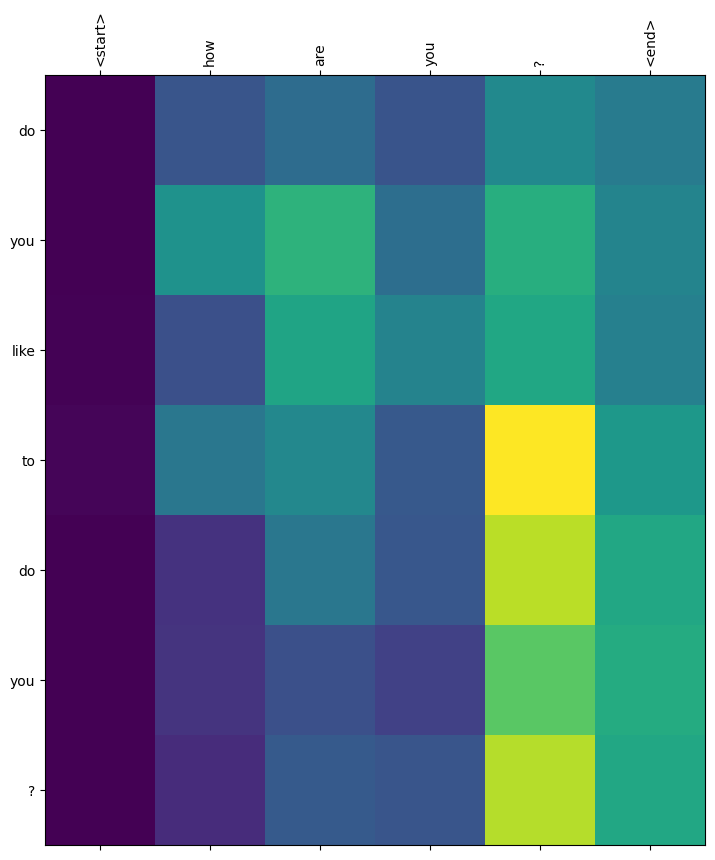

입력문장: <start> i am a student <end>
번역결과: he is a very very room .


<ipython-input-15-c7b164e29a67>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + sentence, rotation=90)
<ipython-input-15-c7b164e29a67>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + predicted_sentence)


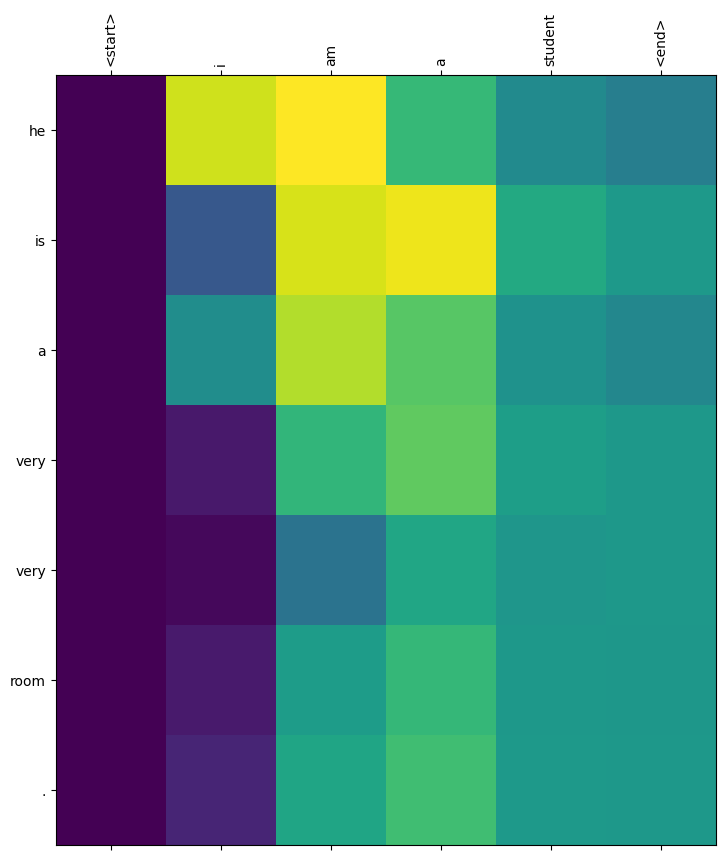

입력문장: <start> thank you very much <end>
번역결과: we re a very room .


<ipython-input-15-c7b164e29a67>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + sentence, rotation=90)
<ipython-input-15-c7b164e29a67>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + predicted_sentence)


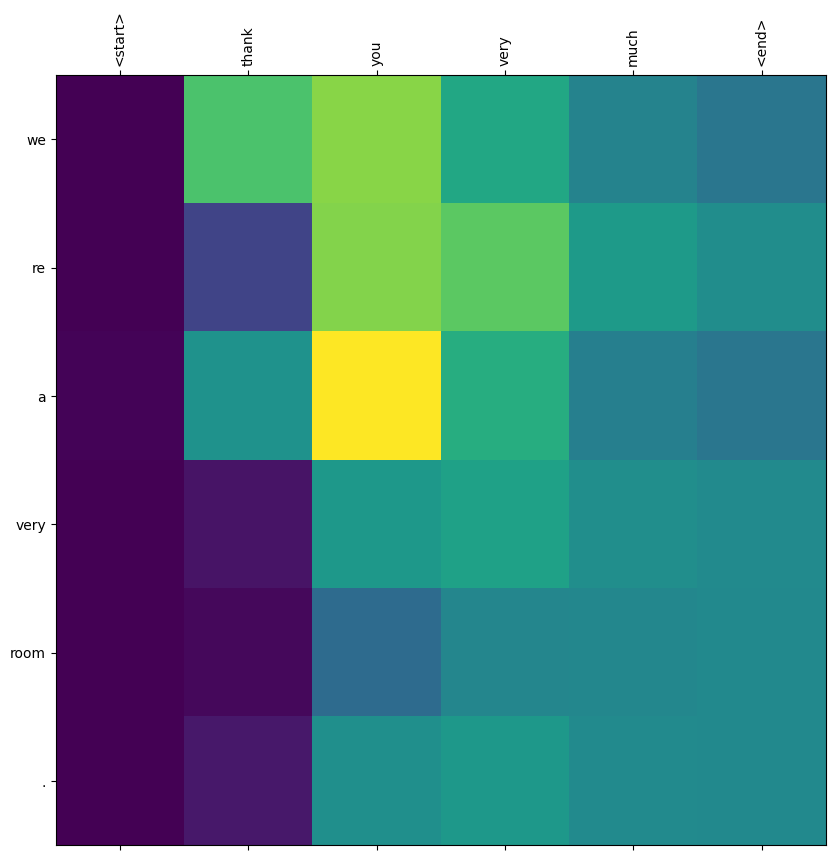

In [ ]:
translate("how are you?")
translate("i am a student")
translate("thank you very much")

입력문장: <start> 나는 학생입니다 <end>
번역결과: i m sorry , i m .


<ipython-input-15-c7b164e29a67>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + sentence, rotation=90)
<ipython-input-15-c7b164e29a67>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + predicted_sentence)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print

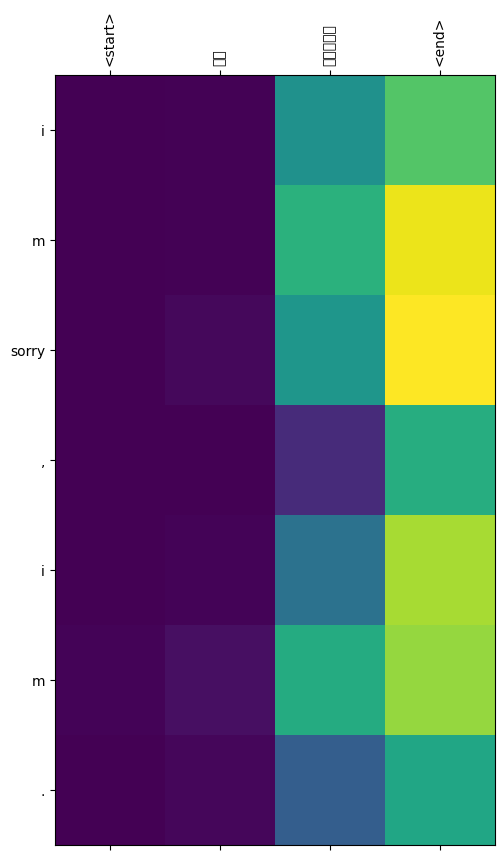

입력문장: <start> 오늘 날씨가 좋네요 <end>
번역결과: tom is a very very very very room .


<ipython-input-15-c7b164e29a67>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + sentence, rotation=90)
<ipython-input-15-c7b164e29a67>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + predicted_sentence)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45720 (\N{HANGUL SYLLABLE NEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_

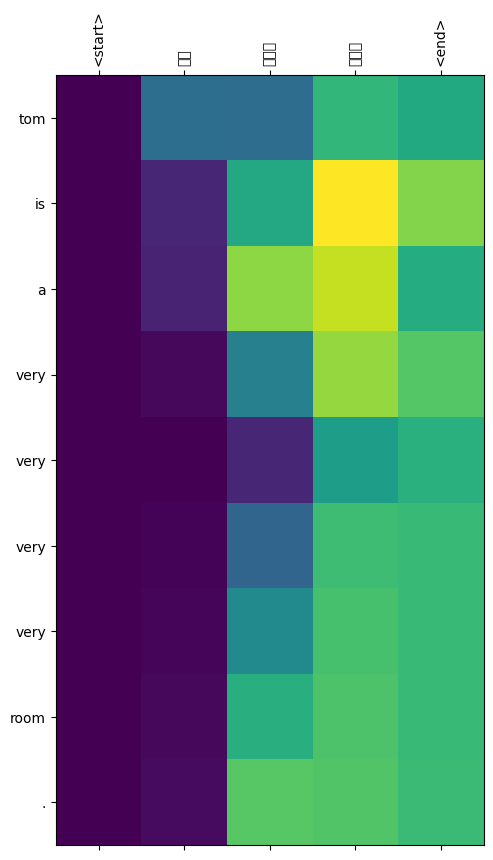

입력문장: <start> 고마워요 <end>
번역결과: we re a very room .


<ipython-input-15-c7b164e29a67>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + sentence, rotation=90)
<ipython-input-15-c7b164e29a67>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + predicted_sentence)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

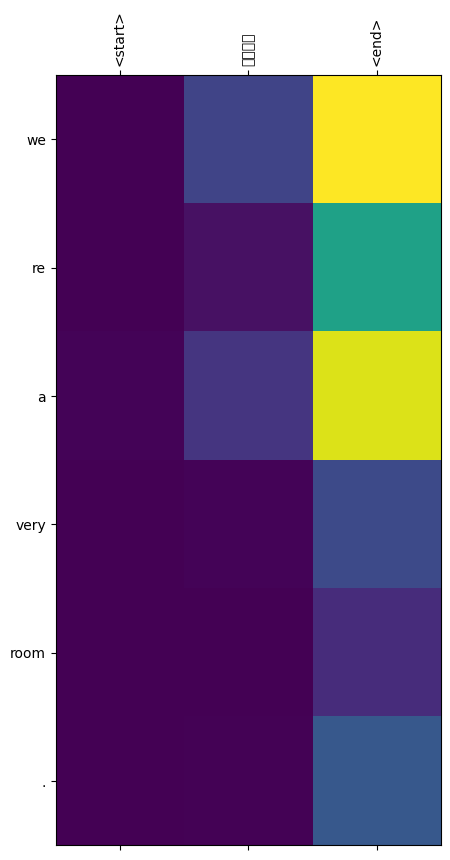

In [ ]:
translate("나는 학생입니다")
translate("오늘 날씨가 좋네요")
translate("고마워요")